In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

path = r"D:\kathan\python_codes\7th sem\CV lab\Comuter-Vision-Lab\image.png"
img_bgr = cv2.imread(path)
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)


(np.float64(-0.5), np.float64(299.5), np.float64(299.5), np.float64(-0.5))

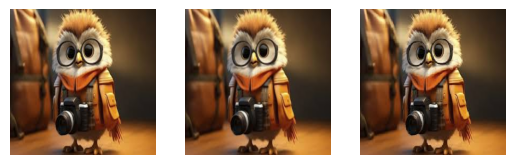

In [8]:
# 1. Resizing with Different Interpolation Methods

pil_img = Image.fromarray(img_rgb)

resize_nearnest = pil_img.resize((300,300), Image.NEAREST)
resize_bilinear = pil_img.resize((300,300), Image.BILINEAR)
resize_bicubic = pil_img.resize((300,300), Image.BICUBIC)

plt.Figure(figsize=(20,10))
plt.subplot(1,3,1)
plt.imshow(resize_bicubic)
plt.axis("off")
plt.subplot(1,3,2)
plt.imshow(resize_bilinear)
plt.axis("off")
plt.subplot(1,3,3)
plt.imshow(resize_nearnest)
plt.axis("off")

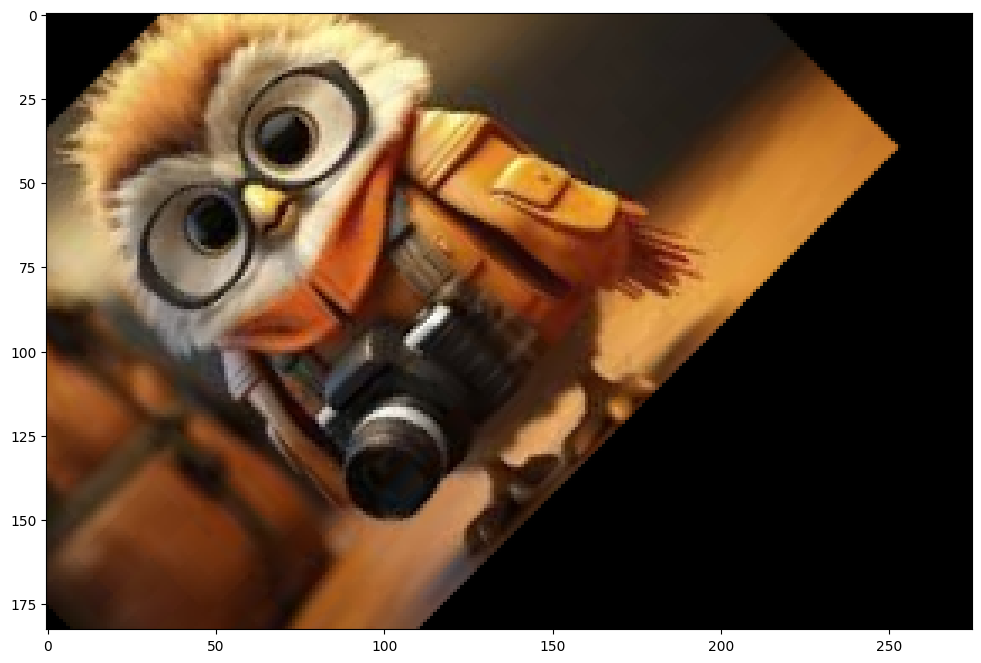

In [9]:
#rotation

angle = 45
h,w = img_rgb.shape[:2]

center = (h//2, w//2)
rotation_matrix = cv2.getRotationMatrix2D(center, angle, scale=1)
rotated_img = cv2.warpAffine(img_rgb, rotation_matrix, (w,h))
plt.figure(figsize=(12,8))
plt.imshow(rotated_img)


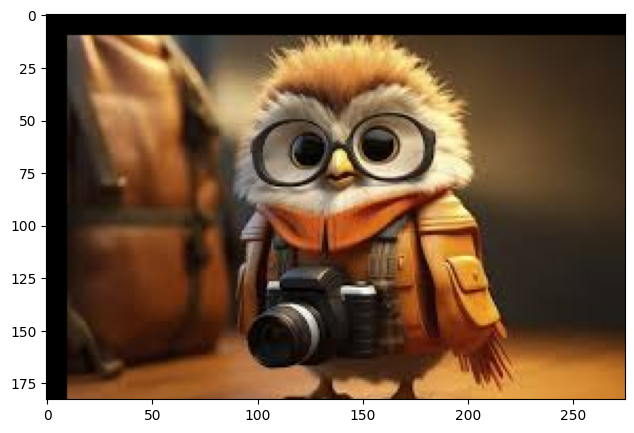

In [10]:

h,w = img_rgb.shape[:2]

tx = 10
ty = 10

translation_matrix = np.float32([[1,0,tx],[0,1,ty]])
tranlated_img = cv2.warpAffine(img_rgb, translation_matrix, (w,h))
plt.figure(figsize=(15,5))
plt.imshow(tranlated_img)


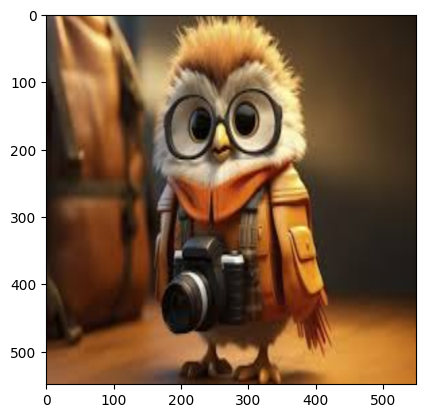

In [13]:
# resizing image

scaled_img = cv2.resize(img_rgb, None, fx=2, fy=3, interpolation=cv2.INTER_LINEAR)
plt.imshow(scaled_img)

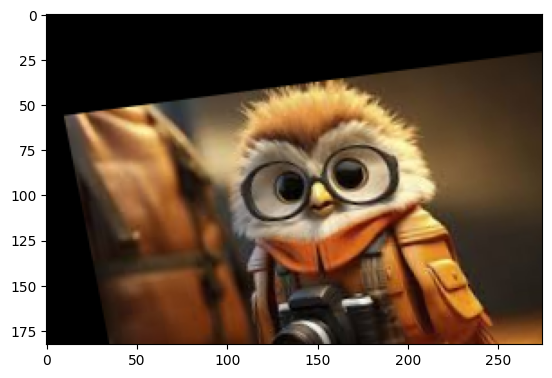

In [15]:
#5. Affine Transformation

# Select 3 points in the original image
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
# Corresponding points in the transformed image
pts2 = np.float32([[70, 100], [220, 80], [100, 250]])

affine_matrix = cv2.getAffineTransform(pts1, pts2)
affine_img = cv2.warpAffine(img_rgb, affine_matrix, (w, h))

plt.imshow(affine_img)

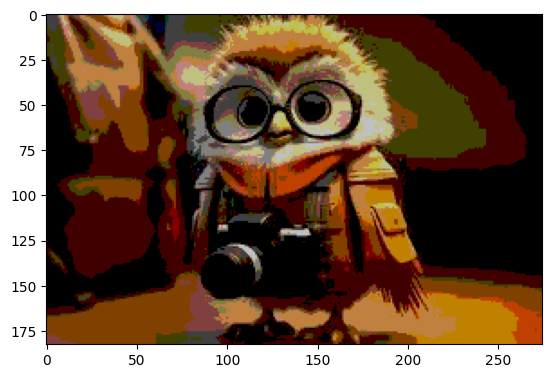

In [16]:
Q = 64
# Perform quantization
quantized_img = (img_rgb // Q) * Q

plt.imshow(quantized_img)